[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/timsainb/tensorflow2-generative-models/blob/master/1.0-Variational-Autoencoder-fashion-mnist.ipynb)

## Install libs

In [1]:
!apt-get install python-opencv

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  python-opencv
0 upgraded, 1 newly installed, 0 to remove and 29 not upgraded.
Need to get 535 kB of archives.
After this operation, 2,944 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python-opencv amd64 3.2.0+dfsg-4ubuntu0.1 [535 kB]
Fetched 535 kB in 1s (698 kB/s)
Selecting previously unselected package python-opencv.
(Reading database ... 134923 files and directories currently installed.)
Preparing to unpack .../python-opencv_3.2.0+dfsg-4ubuntu0.1_amd64.deb ...
Unpacking python-opencv (3.2.0+dfsg-4ubuntu0.1) ...
Setting up python-opencv (3.2.0+dfsg-4ubuntu0.1) ...


In [2]:
!pip install solaris

     |████████████████████████████████| 8.5MB 3.0MB/s 
     |████████████████████████████████| 921kB 38.6MB/s 
     |████████████████████████████████| 3.2MB 36.0MB/s 
     |████████████████████████████████| 61kB 7.7MB/s 
     |████████████████████████████████| 26.6MB 1.5MB/s 
     |████████████████████████████████| 15.2MB 30.9MB/s 
     |████████████████████████████████| 11.8MB 30.4MB/s 
     |████████████████████████████████| 61kB 7.8MB/s 
     |████████████████████████████████| 266kB 42.3MB/s 
     |████████████████████████████████| 92.5MB 85kB/s 
     |████████████████████████████████| 10.1MB 28.6MB/s 
     |████████████████████████████████| 634kB 47.2MB/s 
     |████████████████████████████████| 3.2MB 30.9MB/s 
     |████████████████████████████████| 368kB 48.0MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.3-cp36-none-any.whl size=60764 sha256=a5dcf63f9db5369489e78346dee879a52771677d924e71c5da7f5fba3d4e75de
  Stored in directory: /root/.cache/pip/wheels/20/16

In [3]:
!apt-get install -qq curl g++ make
!curl -L http://download.osgeo.org/libspatialindex/spatialindex-src-1.8.5.tar.gz | tar xz

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  556k  100  556k    0     0  1198k      0 --:--:-- --:--:-- --:--:-- 1198k


In [0]:
import os
os.chdir('spatialindex-src-1.8.5')

In [5]:
!./configure;

checking build system type... x86_64-unknown-linux-gnu
checking for g++... g++
checking whether the C++ compiler works... yes
checking for C++ compiler default output file name... a.out
checking for suffix of executables... 
checking whether we are cross compiling... no
checking for suffix of object files... o
checking whether we are using the GNU C++ compiler... yes
checking whether g++ accepts -g... yes
checking how to run the C++ preprocessor... g++ -E
checking for a BSD-compatible install... /usr/bin/install -c
checking whether ln -s works... yes
checking whether make sets $(MAKE)... yes
checking host system type... x86_64-unknown-linux-gnu
checking how to print strings... printf
checking for gcc... gcc
checking whether we are using the GNU C compiler... yes
checking whether gcc accepts -g... yes
checking for gcc option to accept ISO C89... none needed
checking whether gcc understands -c and -o together... yes
checking for a sed that does not truncate output... /bin/sed
checking fo

In [6]:
!make
!make install

Making all in src
make[1]: Entering directory '/content/spatialindex-src-1.8.5/src'
Making all in storagemanager
make[2]: Entering directory '/content/spatialindex-src-1.8.5/src/storagemanager'
depbase=`echo Buffer.lo | sed 's|[^/]*$|.deps/&|;s|\.lo$||'`;\
/bin/bash ../../libtool  --tag=CXX   --mode=compile g++ -DPACKAGE_NAME=\"spatialindex\" -DPACKAGE_TARNAME=\"spatialindex-src\" -DPACKAGE_VERSION=\"1.8.5\" -DPACKAGE_STRING=\"spatialindex\ 1.8.5\" -DPACKAGE_BUGREPORT=\"mhadji@gmail.com\" -DPACKAGE_URL=\"\" -DSTDC_HEADERS=1 -DHAVE_SYS_TYPES_H=1 -DHAVE_SYS_STAT_H=1 -DHAVE_STDLIB_H=1 -DHAVE_STRING_H=1 -DHAVE_MEMORY_H=1 -DHAVE_STRINGS_H=1 -DHAVE_INTTYPES_H=1 -DHAVE_STDINT_H=1 -DHAVE_UNISTD_H=1 -DHAVE_DLFCN_H=1 -DLT_OBJDIR=\".libs/\" -DPACKAGE=\"spatialindex-src\" -DVERSION=\"1.8.5\" -DHAVE_FCNTL_H=1 -DHAVE_UNISTD_H=1 -DHAVE_SYS_TYPES_H=1 -DHAVE_SYS_STAT_H=1 -DHAVE_PTHREAD_H=1 -DHAVE_SYS_RESOURCE_H=1 -DHAVE_SYS_TIME_H=1 -DHAVE_STDINT_H=1 -DHAVE_FEATURES_H=1 -DHAVE_GETTIMEOFDAY=1 -DHAVE_MEM

In [7]:
!pip install rtree

In [0]:
!ldconfig

## Use script

In [0]:
# Just for comfortable plots
from pylab import *
rcParams['figure.figsize'] = 8, 8 

In [10]:
# This is api script - I cant load as file to colab
import torch
from torch.nn import functional as F
from torchvision.transforms import ToTensor, Normalize, Compose, Resize

import numpy as np
from PIL import Image

import cv2

from solaris.nets.zoo import XDXD_SpaceNet4_UNetVGG16


input_shape = (3, 512, 512)


def load_model(weights_url):
    state_dict = torch.load(weights_url)
    model = XDXD_SpaceNet4_UNetVGG16()

    model.load_state_dict(state_dict=state_dict)
    return model.cuda()


# png/jpeg, return pytorch tensor
def load_img(img_url):
    img = Image.open(img_url)
    img = np.array(img)
    img = Image.fromarray(img[:, :, : input_shape[0]])
    return img


def predict_mask(model, img, threshold=0.3):
    img_transform = Compose([
        Resize((input_shape[1], input_shape[2])),
        ToTensor(),
        Normalize(mean=[0.485, 0.456, 0.406],
                  std=[0.229, 0.224, 0.225]),
    ])

    input_img = torch.unsqueeze(img_transform(img), dim=0).cuda()

    prediction = torch.sigmoid(model(input_img)).data[0].cpu().numpy()[0]
    return np.uint8(prediction > threshold)*(2**8 - 1)


def save_img_with_mask(save_url, img_url, mask, output_size=None):
    img = load_img(img_url)
    if not output_size:
        output_size = img.size
    img = img.resize((input_shape[1], input_shape[2]))
    img_with_mask = Image.fromarray(cv2.bitwise_or(
        np.array(img), np.array(img), mask=255-mask)).resize(output_size)
    img_with_mask.save(save_url)
    print("Image saved!")
    return img_with_mask

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

In [0]:
model = load_model("/content/xdxd_spacenet4_solaris_weights.pth")

In [12]:
img = load_img("/content/img.png")
mask = predict_mask(model, img, 0.1)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


In [13]:
img_with_mask = save_img_with_mask("/content/img_with_mask.jpg", "/content/img.png", mask)

Image saved!


## How does it work (Additional)

In [0]:
import torch
from torch.nn import functional as F
from torchvision.transforms import ToTensor, Normalize, Compose, Resize


import numpy as np
from PIL import Image

In [0]:
from solaris.nets.zoo import XDXD_SpaceNet4_UNetVGG16

input_shape = (3, 512, 512)
state_dict = torch.load("/content/xdxd_spacenet4_solaris_weights.pth")
model = XDXD_SpaceNet4_UNetVGG16()

model.load_state_dict(state_dict=state_dict)

model = model.cuda()

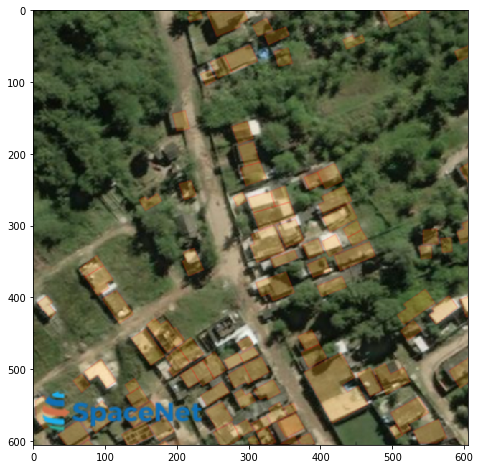

In [16]:
img = Image.open("/content/img.png")
img = np.array(img)
imshow(img)
img = Image.fromarray(img[:, :, : input_shape[0]])

In [0]:
img_transform = Compose([
    Resize((input_shape[1], input_shape[2])),
    ToTensor(),
    Normalize(mean=[0.485, 0.456, 0.406],
              std=[0.229, 0.224, 0.225]),
])

In [0]:
input_img = torch.unsqueeze(img_transform(img), dim=0).cuda()

In [19]:
input_img.shape

torch.Size([1, 3, 512, 512])

In [20]:
prediction = torch.sigmoid(model(input_img)).data[0].cpu().numpy()[0]

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2494: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  "See the documentation of nn.Upsample for details.".format(mode))


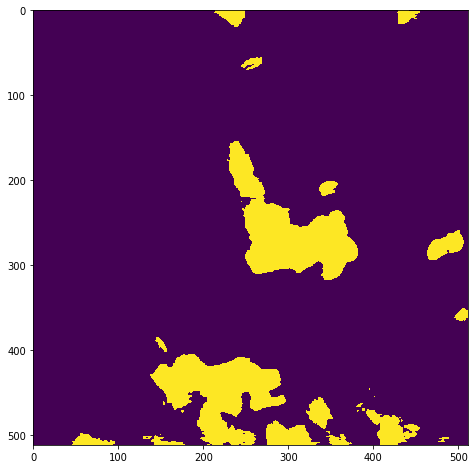

In [21]:
imshow(prediction > 0.3);